# Canny算子与图像轮廓检测

## Canny函数使用

- 提供两个重载函数。

1. 函数定义

```C++
    void 	cv::Canny (
        InputArray image,             // 原始图像
        OutputArray edges,          // 输出的边缘图像
        double threshold1,            // 轮廓低阈值
        double threshold2,           // 轮廓高阈值
        int apertureSize=3,          // Sobel算子核的大小
        bool L2gradient=false)
```

```C++
    void 	cv::Canny (
        InputArray dx, 
        InputArray dy, 
        OutputArray edges, 
        double threshold1, 
        double threshold2, 
        bool L2gradient=false)
```

2. 参数说明

- 原始图像：
    1. InputArray image：直接使用原始灰度图像，图像格式必须是CV_8UC1
    2. InputArray dx/InputArray dy：使用图像处理后的梯度图像，x-梯度与梯度（可以使用Sobel算子得到）
- 输出图像：
    - OutputArray edges：输出的也是灰度图CV_8UC1
- 提取边缘的阈值：
    - 可以使用阈值动态得到边缘；
    - 阈值范围：`[double 	threshold1, double 	threshold2]`；
    - 阈值可以过滤掉梯度变化不是那么大的像素点。
- 使用x，y方向梯度计算像素梯度的方式：
    - bool 	L2gradient = false 
    - 使用采用2-范数计算最后像素梯度：
        1. true：$L_2 = \sqrt{(\dfrac{dI}{dx}) ^2+ (\dfrac{dI}{dy}) ^2}$
        2. false：$L1 =|\dfrac{dI}{dx}|+ |\dfrac{dI}{dy}|$

- Sobel的kernel大小
    - 对于原始图像，可以指定Sobel算子Kernel大小。`int 	apertureSize = 3`，一般采用 `3 \ast 3`

3. 使用例子
    - 注意：其中dx，dy调用Sobel函数得到x-梯度与y-梯度。

```C++
    #include "imageprocess.h"

    ImageProc::ImageProc():
        filename_image(new cv::String("lotus.png")){
        m_src = cv::imread(*filename_image);
    }
    ImageProc::ImageProc(const char *filename):
        filename_image(new cv::String(filename)){
        m_src = cv::imread(*filename_image);
    }
    ImageProc::~ImageProc(){
        delete filename_image;
        m_src.release();
    }
    void ImageProc::toGray(){
        cv::cvtColor(m_src, m_gray,cv::COLOR_BGR2GRAY);
    }
    // 计算梯度
    void ImageProc::toGradient(){
        cv::Sobel(m_gray, m_grad_x_16, CV_16SC1, 1, 0, 3);  // 最后参数3表示kernel的大小
        cv::Sobel(
            m_gray,             // 输入的灰度图像
            m_grad_y_16,        // 输出的CV_16SC1类型的梯度（可以输出位CV_8UC1），但在Canny函数需要CV_16SC1的格式
            CV_16SC1, 
            0, 
            1, 
            3);

        m_grad_x_16.convertTo(m_grad_x, CV_8UC1);   // 转换为颜色CV_8UC1格式（便于Qt显示）
        m_grad_y_16.convertTo(m_grad_y, CV_8UC1);       

    }
    // 边缘检测
    void ImageProc::toCanny(){
        /* cv::Canny(
            m_gray,         // 输入的灰度图
            m_canny,        // 输出的边缘图
            150,            // 过滤的最小阈值
            255,            // 过滤的最大阈值
            3,              // 使用sobel计算x与y梯度的kernel的大小。
            true);          // x与y梯度转换为像素的梯度的计算方式1-范数与2范数。
        */
        cv::Canny(          // 与上面效果一样
            m_grad_x_16,    // x梯度- 必须是CV_16S1或者CV_16S3类型
            m_grad_y_16,    // y梯度- 必须是CV_16S1或者CV_16S3类型
            m_canny,        // 输出边缘图像
            150,            // 过滤的最小阈值
            255,            // 过滤的最大阈值
            true);          // x与y梯度转换为像素的梯度的计算方式1-范数与2范数。
    }

```

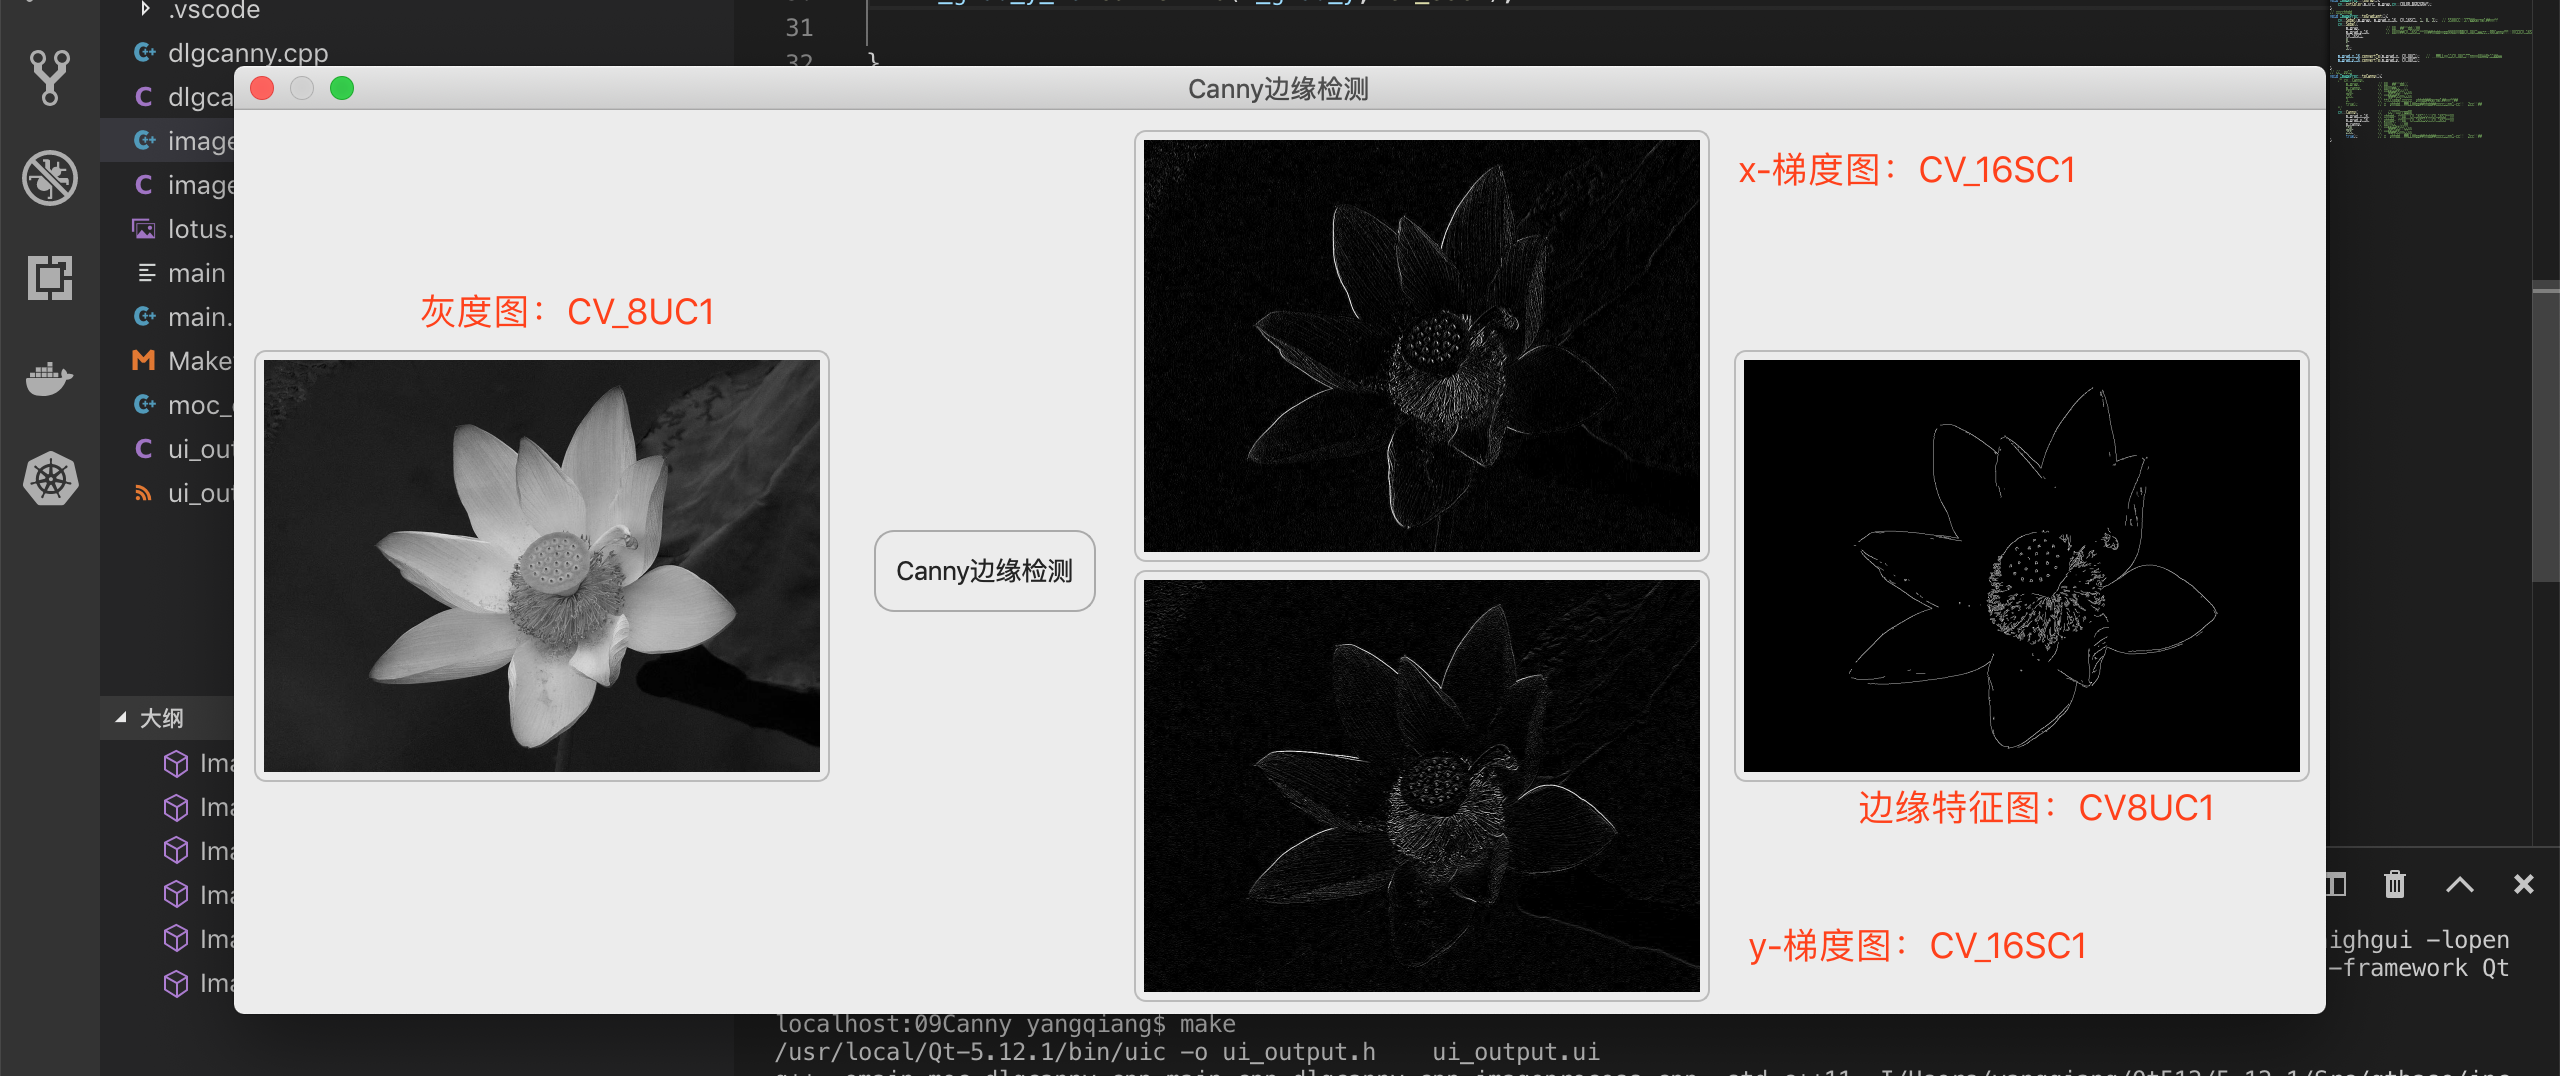

----